In [31]:
!pip install pip==21.3.1
!pip install prophet
!pip install pystan==2.19
!pip install fbprophet

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached cmdstanpy-1.0.8-py3-none-any.whl (81 kB)
  Attempting uninstall: cmdstanpy
    Found existing installation: cmdstanpy 0.9.5
    Uninstalling cmdstanpy-0.9.5:
      Successfully uninstalled cmdstanpy-0.9.5
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
fbprophet 0.7.1 requires cmdstanpy==0.9.5, but you have cmdstanpy 1.0.8 which is incompatible.
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached cmdstanpy-0.9.5-py3-none-any.whl (37 kB)
  Attempting uninstall: cmdstanpy
    Found existing insta

In [213]:
import pandas as pd
from prophet.plot import plot_plotly, plot_components_plotly
from fbprophet import Prophet
import matplotlib.pyplot as plt

In [169]:
df = pd.read_csv('/content/Historical Weather Data 2010-2021_preprocessed_2.csv')
df.dropna(inplace= True)
df.reset_index(drop=True, inplace=True)
df

,observation,date,month,year,tempC_7to8,tempC_1to2,tempC_6to7,tempC_avg(0C),Relative humidity_7to8,Relative humidity_1to2,...,soil_pH,water_pH,water_TDS_mgpl,Label (Disease Yes/No),Type of Disease (Bacterial Blight/Telya),Anthracnose,Fruit Spot/ Rot,Fusarium Wilt,Fruit Borer / Blight Blora,NewLabel
0,2010-01-01,1,1,2010,20,30,20,23,42,33,...,6.91,7.18,1709.0,0,0,0,0,0,0,0
1,2010-01-02,2,1,2010,23,29,23,25,49,40,...,6.77,7.66,1707.0,1,1,1,0,0,0,24
2,2010-01-03,3,1,2010,24,27,21,24,61,50,...,6.76,7.44,1707.0,0,0,0,0,0,0,0
3,2010-01-04,4,1,2010,23,29,20,24,57,30,...,7.10,7.43,1708.0,0,0,0,0,0,0,0
4,2010-01-05,5,1,2010,22,30,21,24,48,34,...,6.53,8.05,1709.0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4173,2021-11-27,27,11,2021,21,32,27,26,56,35,...,7.17,7.69,1707.0,1,1,0,0,0,0,16
4174,2021-11-28,28,11,2021,21,31,26,26,58,32,...,7.46,8.22,1709.0,1,1,0,0,0,0,16
4175,2021-11-29,29,11,2021,17,26,24,22,49,29,...,7.38,7.92,1709.0,0,0,0,0,0,0,0
4176,2021-11-30,30,11,2021,17,27,22,22,52,41,...,7.01,7.16,1630.2,0,0,0,0,0,0,0


In [170]:
col_list = ['tempC_avg(0C)', 'Relative humidity_avg(%)', 'windspeedKmph_avg(Km/h)', 
            'pressureMB_avg', 'precipMM_avg(mm)', 'weatherDesc', 'Sunshine Hours', '%_soil_moisure']

In [171]:
df = df[["observation","tempC_avg(0C)"]]
df.head()

,observation,tempC_avg(0C)
0,2010-01-01,23
1,2010-01-02,25
2,2010-01-03,24
3,2010-01-04,24
4,2010-01-05,24


In [172]:
# Change Column Names for FB Prophet
df.columns = ['ds','y']

In [173]:
df['ds'] = pd.to_datetime(df['ds'])
df.tail()

<ipython-input-173-df3eb660f625>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,ds,y
4173,2021-11-27,26
4174,2021-11-28,26
4175,2021-11-29,22
4176,2021-11-30,22
4177,2021-12-01,17


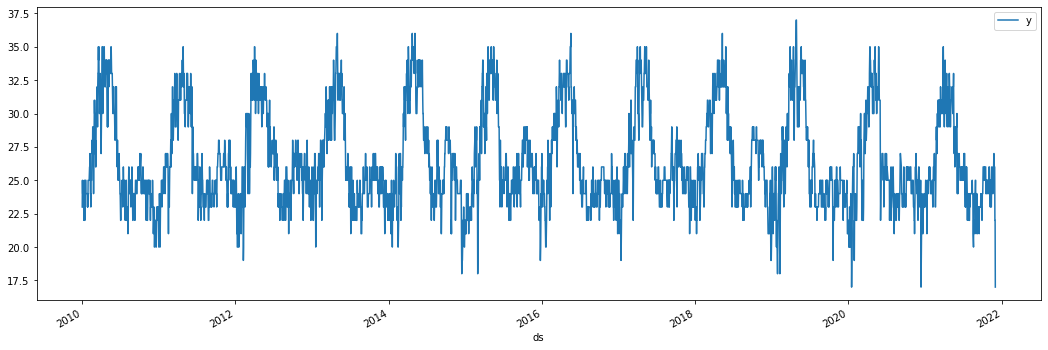

In [174]:
# Plot Your Data
df.plot(x='ds',y='y',figsize=(18,6))

In [175]:
len(df) 

4178

In [176]:
# 3517 + 350, 67-14

In [177]:
df1 = df.iloc[2461:]
df1.reset_index(drop=True, inplace=True)
df1

,ds,y
0,2017-01-01,25
1,2017-01-02,24
2,2017-01-03,21
3,2017-01-04,23
4,2017-01-05,24
...,...,...
1712,2021-11-27,26
1713,2021-11-28,26
1714,2021-11-29,22
1715,2021-11-30,22


In [178]:
df = df1

In [179]:
# Train, Test Split
train = df.iloc[:len(df)-365]
test = df.iloc[len(df)-365:]

In [180]:
# Start Making Predictions
m = Prophet()
m.fit(train)
future = m.make_future_dataframe(periods=365) #MS for monthly, H for hourly
forecast = m.predict(future)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [181]:
future

,ds
0,2017-01-01
1,2017-01-02
2,2017-01-03
3,2017-01-04
4,2017-01-05
...,...
1712,2021-11-14
1713,2021-11-15
1714,2021-11-16
1715,2021-11-17


In [182]:
forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
1712,2021-11-14,25.064587,21.695691,26.067665,24.901781,25.227410,-1.111824,-1.111824,-1.111824,0.107321,0.107321,0.107321,-1.219144,-1.219144,-1.219144,0.0,0.0,0.0,23.952763
1713,2021-11-15,25.063298,21.738651,26.035666,24.899746,25.227096,-1.164948,-1.164948,-1.164948,0.040418,0.040418,0.040418,-1.205367,-1.205367,-1.205367,0.0,0.0,0.0,23.898350
1714,2021-11-16,25.062009,21.778406,26.116754,24.897711,25.226781,-1.154629,-1.154629,-1.154629,0.039268,0.039268,0.039268,-1.193896,-1.193896,-1.193896,0.0,0.0,0.0,23.907381
1715,2021-11-17,25.060721,21.698910,25.989686,24.895676,25.226467,-1.146713,-1.146713,-1.146713,0.038889,0.038889,0.038889,-1.185602,-1.185602,-1.185602,0.0,0.0,0.0,23.914007
1716,2021-11-18,25.059432,21.587005,25.929579,24.893642,25.226153,-1.269468,-1.269468,-1.269468,-0.088150,-0.088150,-0.088150,-1.181319,-1.181319,-1.181319,0.0,0.0,0.0,23.789964


In [183]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
1712,2021-11-14,23.952763,21.695691,26.067665
1713,2021-11-15,23.898350,21.738651,26.035666
1714,2021-11-16,23.907381,21.778406,26.116754
1715,2021-11-17,23.914007,21.698910,25.989686
1716,2021-11-18,23.789964,21.587005,25.929579


In [184]:
test.tail()

,ds,y
1712,2021-11-27,26
1713,2021-11-28,26
1714,2021-11-29,22
1715,2021-11-30,22
1716,2021-12-01,17


In [185]:
# USING BUILT-IN FB PROPHET VISUALIZATION
plot_plotly(m ,forecast)

In [186]:
future = m.make_future_dataframe(periods=60) #MS for monthly, H for hourly
forecast = m.predict(future)

In [187]:
plot_plotly(m ,forecast)

In [188]:
forecast[['ds', 'yhat']]

,ds,yhat
0,2017-01-01,22.701147
1,2017-01-02,22.691546
2,2017-01-03,22.751846
3,2017-01-04,22.815729
4,2017-01-05,22.754424
...,...,...
1407,2021-01-13,22.174192
1408,2021-01-14,22.079368
1409,2021-01-15,22.067752
1410,2021-01-16,22.205645


In [189]:
future = m.make_future_dataframe(periods=120) #MS for monthly, H for hourly
future = future[30:]

forecast = m.predict(future)

In [190]:
plot_plotly(m ,forecast)

In [210]:
plot_components_plotly(m, forecast)

In [191]:
future

,ds
30,2017-02-01
31,2017-02-02
32,2017-02-03
33,2017-02-04
34,2017-02-05
...,...
1467,2021-03-14
1468,2021-03-15
1469,2021-03-16
1470,2021-03-17


In [192]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2017-02-01,26.630479,22.153657,26.244755,26.630479,26.630479,-2.527862,-2.527862,-2.527862,0.038889,0.038889,0.038889,-2.566751,-2.566751,-2.566751,0.0,0.0,0.0,24.102617
1,2017-02-02,26.631589,21.889106,26.106478,26.631589,26.631589,-2.530940,-2.530940,-2.530940,-0.088150,-0.088150,-0.088150,-2.442790,-2.442790,-2.442790,0.0,0.0,0.0,24.100650
2,2017-02-03,26.632699,21.827729,26.283336,26.632699,26.632699,-2.432194,-2.432194,-2.432194,-0.126736,-0.126736,-0.126736,-2.305458,-2.305458,-2.305458,0.0,0.0,0.0,24.200505
3,2017-02-04,26.633809,22.203197,26.576819,26.633809,26.633809,-2.166360,-2.166360,-2.166360,-0.011010,-0.011010,-0.011010,-2.155350,-2.155350,-2.155350,0.0,0.0,0.0,24.467449
4,2017-02-05,26.634919,22.529661,26.921167,26.634919,26.634919,-1.886050,-1.886050,-1.886050,0.107321,0.107321,0.107321,-1.993370,-1.993370,-1.993370,0.0,0.0,0.0,24.748870
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1437,2021-03-14,25.380295,24.522103,28.841431,25.354265,25.407723,1.312494,1.312494,1.312494,0.107321,0.107321,0.107321,1.205173,1.205173,1.205173,0.0,0.0,0.0,26.692789
1438,2021-03-15,25.379007,24.724498,28.937219,25.352529,25.406681,1.391444,1.391444,1.391444,0.040418,0.040418,0.040418,1.351025,1.351025,1.351025,0.0,0.0,0.0,26.770450
1439,2021-03-16,25.377718,24.933213,28.930531,25.350865,25.405909,1.559030,1.559030,1.559030,0.039268,0.039268,0.039268,1.519763,1.519763,1.519763,0.0,0.0,0.0,26.936748
1440,2021-03-17,25.376429,24.941714,29.218620,25.349198,25.404912,1.749560,1.749560,1.749560,0.038889,0.038889,0.038889,1.710671,1.710671,1.710671,0.0,0.0,0.0,27.125989


In [193]:
m

In [194]:
# https://stackoverflow.com/questions/28268818/how-to-find-the-date-n-days-ago-in-python
# Current Date:
import datetime
Current_Date = datetime.datetime.today()
print(Current_Date.date())

2023-01-15


In [195]:
# Previous Date:
Previous_Date = datetime.datetime.today() - datetime.timedelta(days=1) #n=1
print (Previous_Date.date())

2023-01-14


In [196]:
# Next-Day Date:
NextDay_Date = datetime.datetime.today() + datetime.timedelta(days=1)
print (NextDay_Date.date())

2023-01-16


In [197]:
for day in range(1, 31):
  NextDay_Date = datetime.datetime.today() + datetime.timedelta(days=day)
  print (NextDay_Date.date())

2023-01-16
2023-01-17
2023-01-18
2023-01-19
2023-01-20
2023-01-21
2023-01-22
2023-01-23
2023-01-24
2023-01-25
2023-01-26
2023-01-27
2023-01-28
2023-01-29
2023-01-30
2023-01-31
2023-02-01
2023-02-02
2023-02-03
2023-02-04
2023-02-05
2023-02-06
2023-02-07
2023-02-08
2023-02-09
2023-02-10
2023-02-11
2023-02-12
2023-02-13
2023-02-14


In [200]:
next_days = [(datetime.datetime.today().date() + datetime.timedelta(days=day)) for day in range(1, 31)]
print(next_days)

[datetime.date(2023, 1, 16), datetime.date(2023, 1, 17), datetime.date(2023, 1, 18), datetime.date(2023, 1, 19), datetime.date(2023, 1, 20), datetime.date(2023, 1, 21), datetime.date(2023, 1, 22), datetime.date(2023, 1, 23), datetime.date(2023, 1, 24), datetime.date(2023, 1, 25), datetime.date(2023, 1, 26), datetime.date(2023, 1, 27), datetime.date(2023, 1, 28), datetime.date(2023, 1, 29), datetime.date(2023, 1, 30), datetime.date(2023, 1, 31), datetime.date(2023, 2, 1), datetime.date(2023, 2, 2), datetime.date(2023, 2, 3), datetime.date(2023, 2, 4), datetime.date(2023, 2, 5), datetime.date(2023, 2, 6), datetime.date(2023, 2, 7), datetime.date(2023, 2, 8), datetime.date(2023, 2, 9), datetime.date(2023, 2, 10), datetime.date(2023, 2, 11), datetime.date(2023, 2, 12), datetime.date(2023, 2, 13), datetime.date(2023, 2, 14)]


In [203]:
next_days[0]

datetime.date(2023, 1, 16)

In [204]:
next_df = pd.DataFrame(next_days, columns=['ds'])
next_df

,ds
0,2023-01-16
1,2023-01-17
2,2023-01-18
3,2023-01-19
4,2023-01-20
5,2023-01-21
6,2023-01-22
7,2023-01-23
8,2023-01-24
9,2023-01-25


In [205]:
forecast = m.predict(next_df)

In [208]:
forecast[['ds','yhat']]

,ds,yhat
0,2023-01-16,21.305227
1,2023-01-17,21.324079
2,2023-01-18,21.339980
3,2023-01-19,21.226477
4,2023-01-20,21.199842
5,2023-01-21,21.327249
6,2023-01-22,21.458427
7,2023-01-23,21.407062
8,2023-01-24,21.425709
9,2023-01-25,21.450966


In [209]:
import pickle

# save the model to disk
filename = f'temp_pro.pkl'
# filename = re.sub('\W+','_', filename )+'.pkl'
pickle.dump(m, open(filename, 'wb'))
print(f'File saved : {filename}')


File saved : temp_pro.pkl


In [222]:
def model_build_and_train(df, col_name):
  print(f"{col_name}")

  df = df[["observation",f"{col_name}"]]

  # Change Column Names for FB Prophet
  df.columns = ['ds','y']

  # Change cloumns datatype to datetime
  df['ds'] = pd.to_datetime(df['ds'])

  # display
  display(df.head())

  # Plot Your Data
  df.plot(x='ds',y='y',figsize=(18,6))
  plt.show()

  # Select data range  
  df1 = df.iloc[2461:]
  df1.reset_index(drop=True, inplace=True)
  df = df1

  # Train, Test Split
  train = df.iloc[:len(df)-365]
  test = df.iloc[len(df)-365:]

  # Start Making Predictions
  m = Prophet()
  m.fit(train)
  future = m.make_future_dataframe(periods=365) #MS for monthly, H for hourly
  forecast = m.predict(future)

  # display
  display(forecast[['ds', 'yhat']].head())

  return m, forecast

  

tempC_avg(0C)


<ipython-input-222-b02c91694b59>:10: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,ds,y
0,2010-01-01,23
1,2010-01-02,25
2,2010-01-03,24
3,2010-01-04,24
4,2010-01-05,24


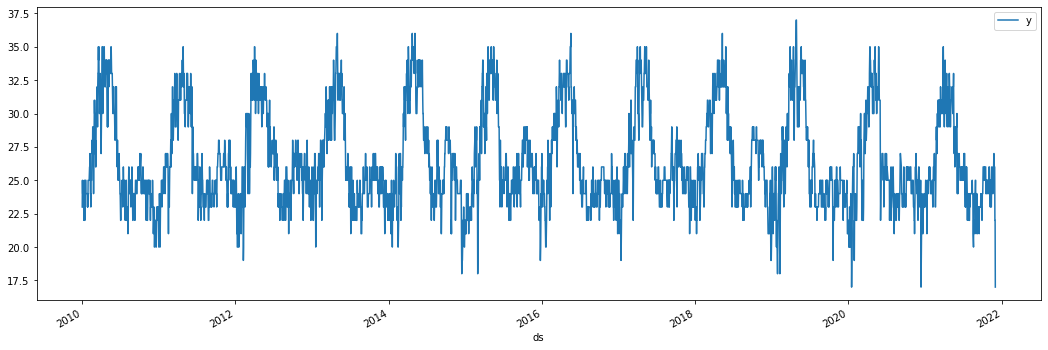

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds,yhat
0,2017-01-01,22.701147
1,2017-01-02,22.691546
2,2017-01-03,22.751846
3,2017-01-04,22.815729
4,2017-01-05,22.754424


m : <fbprophet.forecaster.Prophet object at 0x7f4ee6d2bd00>
Relative humidity_avg(%)


<ipython-input-222-b02c91694b59>:10: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,ds,y
0,2010-01-01,44
1,2010-01-02,50
2,2010-01-03,63
3,2010-01-04,46
4,2010-01-05,45


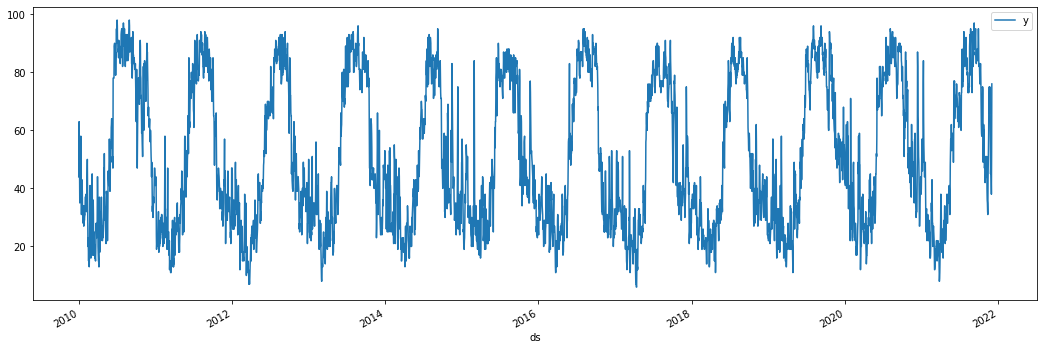

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds,yhat
0,2017-01-01,35.799522
1,2017-01-02,35.851941
2,2017-01-03,35.832954
3,2017-01-04,35.765227
4,2017-01-05,36.092502


m : <fbprophet.forecaster.Prophet object at 0x7f4ee6bef8e0>
windspeedKmph_avg(Km/h)


<ipython-input-222-b02c91694b59>:10: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,ds,y
0,2010-01-01,5
1,2010-01-02,5
2,2010-01-03,6
3,2010-01-04,6
4,2010-01-05,4


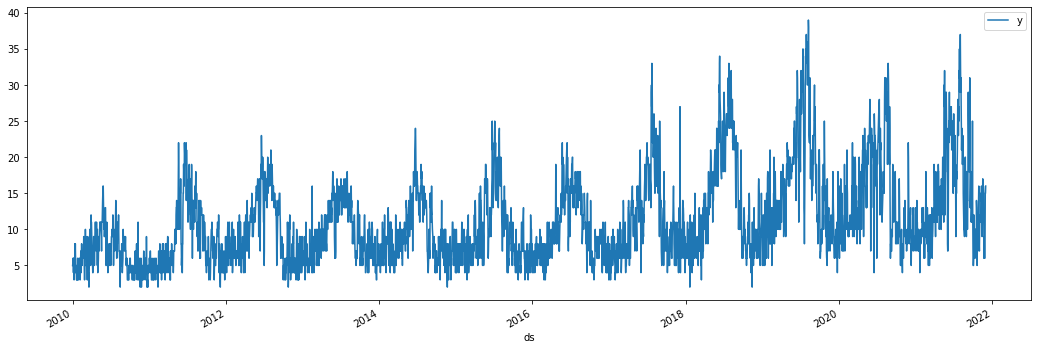

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds,yhat
0,2017-01-01,4.289928
1,2017-01-02,4.347407
2,2017-01-03,4.253376
3,2017-01-04,4.154768
4,2017-01-05,4.240167


m : <fbprophet.forecaster.Prophet object at 0x7f4ee6997f70>
pressureMB_avg


<ipython-input-222-b02c91694b59>:10: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,ds,y
0,2010-01-01,1013
1,2010-01-02,1014
2,2010-01-03,1015
3,2010-01-04,1013
4,2010-01-05,1011


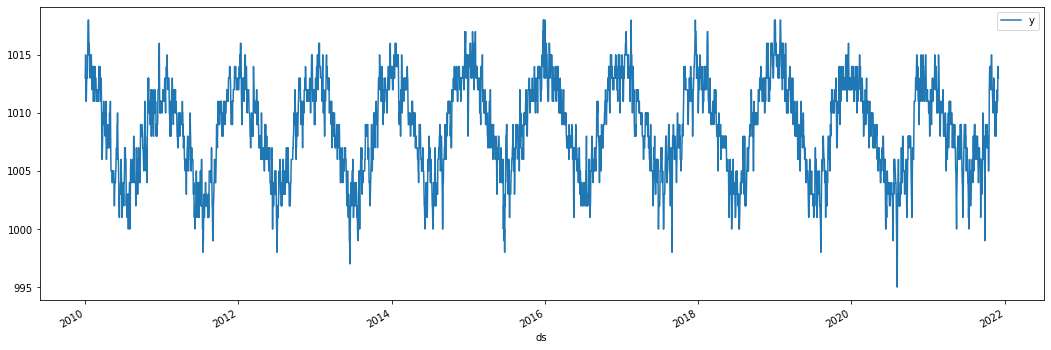

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds,yhat
0,2017-01-01,1014.426740
1,2017-01-02,1014.202295
2,2017-01-03,1014.083603
3,2017-01-04,1014.080044
4,2017-01-05,1014.011504


m : <fbprophet.forecaster.Prophet object at 0x7f4ee5bb6640>
precipMM_avg(mm)


<ipython-input-222-b02c91694b59>:10: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,ds,y
0,2010-01-01,0.0
1,2010-01-02,0.0
2,2010-01-03,0.0
3,2010-01-04,0.0
4,2010-01-05,0.0


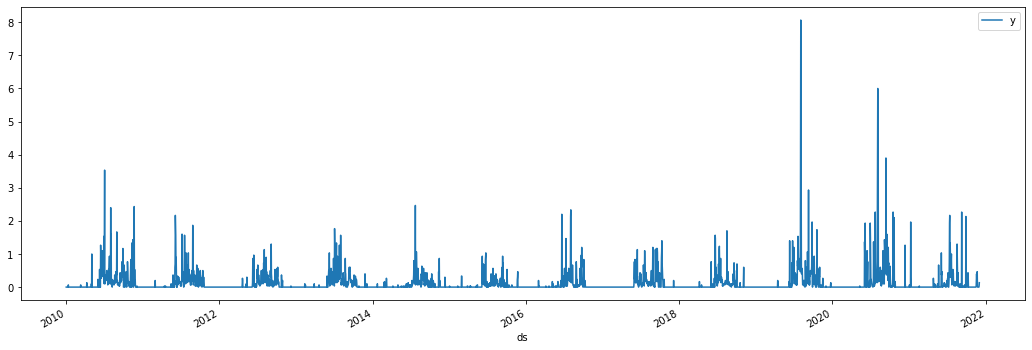

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds,yhat
0,2017-01-01,0.017136
1,2017-01-02,0.015405
2,2017-01-03,0.034467
3,2017-01-04,0.028315
4,2017-01-05,0.037126


m : <fbprophet.forecaster.Prophet object at 0x7f4ee696c370>
weatherDesc


<ipython-input-222-b02c91694b59>:10: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,ds,y
0,2010-01-01,5
1,2010-01-02,4
2,2010-01-03,4
3,2010-01-04,5
4,2010-01-05,5


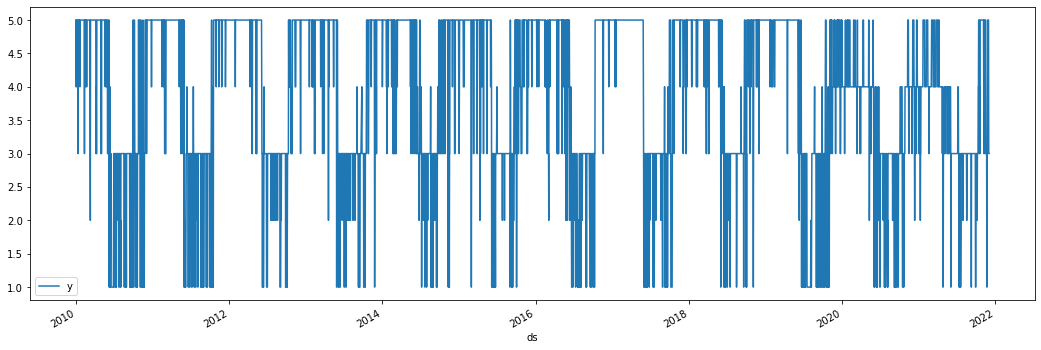

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds,yhat
0,2017-01-01,4.767072
1,2017-01-02,4.741519
2,2017-01-03,4.771663
3,2017-01-04,4.716971
4,2017-01-05,4.760808


m : <fbprophet.forecaster.Prophet object at 0x7f4ee5d18e80>
Sunshine Hours


<ipython-input-222-b02c91694b59>:10: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,ds,y
0,2010-01-01,9.8
1,2010-01-02,9.8
2,2010-01-03,9.8
3,2010-01-04,9.8
4,2010-01-05,9.8


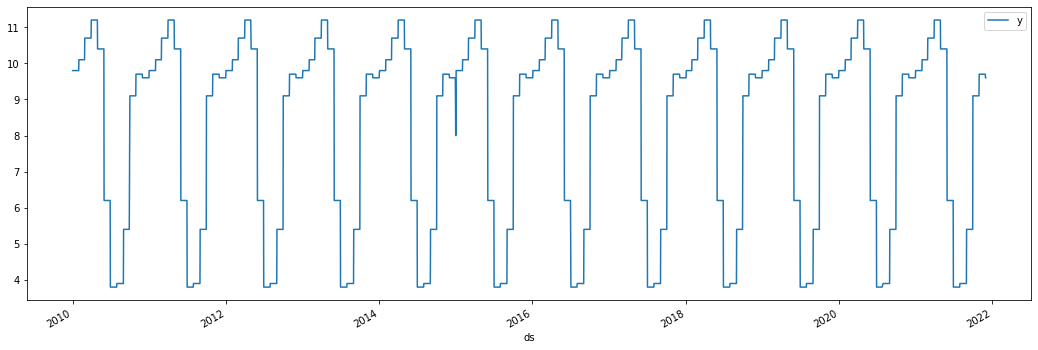

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds,yhat
0,2017-01-01,9.829752
1,2017-01-02,9.795765
2,2017-01-03,9.789302
3,2017-01-04,9.806731
4,2017-01-05,9.741665


m : <fbprophet.forecaster.Prophet object at 0x7f4ee6ae0d90>
%_soil_moisure


<ipython-input-222-b02c91694b59>:10: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,ds,y
0,2010-01-01,45
1,2010-01-02,45
2,2010-01-03,41
3,2010-01-04,43
4,2010-01-05,44


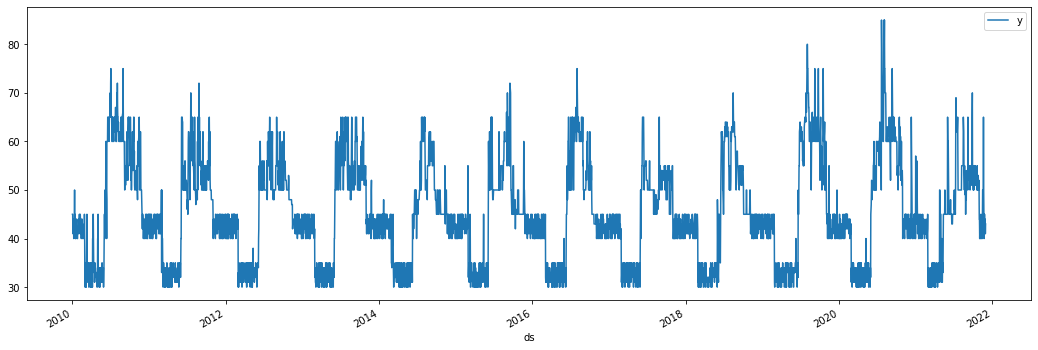

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds,yhat
0,2017-01-01,44.185908
1,2017-01-02,44.580240
2,2017-01-03,44.368643
3,2017-01-04,44.390405
4,2017-01-05,44.455907


m : <fbprophet.forecaster.Prophet object at 0x7f4ee61d93d0>


In [224]:
df = pd.read_csv('/content/Historical Weather Data 2010-2021_preprocessed_2.csv')
df.dropna(inplace= True)
df.reset_index(drop=True, inplace=True)

col_list = ['tempC_avg(0C)', 'Relative humidity_avg(%)', 'windspeedKmph_avg(Km/h)', 
            'pressureMB_avg', 'precipMM_avg(mm)', 'weatherDesc', 'Sunshine Hours', '%_soil_moisure']
for col_name in col_list:
  m ,forecast = model_build_and_train(df, col_name)
  print(f"m : {m}")

  
  # USING BUILT-IN FB PROPHET VISUALIZATION
  plot_plotly(m ,forecast)
  plt.show()

  plot_components_plotly(m, forecast)
  plt.show()